In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [ ]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
scalerx = StandardScaler().fit(xt)
xScaled = scalerx.transform(xt)

In [ ]:
xScaled = xScaled.reshape(-1,28,28,3)
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
counterx=0
countery=0
add = []
for idx, i in enumerate(y_train):
        if i == 1:
            counterx += 4
            for k in range(0, 4):
                y_train = np.append(y_train, i)
                add = np.append(add, X_train[idx, :, :, :])
        else: 
             countery += 1
X_train = np.vstack((X_train, add.reshape(-1, 28, 28, 3)))
print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

In [145]:
MLP = Sequential()
MLP.add(Convolution2D(16, (2,2), input_shape=(28,28,3), activation='relu'))
MLP.add(MaxPooling2D(pool_size=(2,2)))
MLP.add(Convolution2D(8, (2,2), input_shape=(28,28,3), activation='relu'))
MLP.add(MaxPooling2D(pool_size=(2,2)))
MLP.add(Flatten()) 
MLP.add(Dense(16, activation='relu'))
MLP.add(Dense(8, activation='relu'))
MLP.add(Dense(2, activation='softmax'))

In [146]:
# MLP.summary()

In [147]:
MLP.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'mse'])

In [148]:
callback = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_validation, y_validation), verbose=2, batch_size=32, callbacks=[callback])

Epoch 1/25


197/197 - 3s - loss: 0.5030 - accuracy: 0.7272 - mse: 0.3251 - val_loss: 0.4891 - val_accuracy: 0.6513 - val_mse: 0.3640 - 3s/epoch - 14ms/step
Epoch 2/25
197/197 - 2s - loss: 0.4266 - accuracy: 0.7792 - mse: 0.3522 - val_loss: 0.4660 - val_accuracy: 0.7342 - val_mse: 0.3783 - 2s/epoch - 10ms/step
Epoch 3/25
197/197 - 2s - loss: 0.4001 - accuracy: 0.7975 - mse: 0.3621 - val_loss: 0.4030 - val_accuracy: 0.7863 - val_mse: 0.3835 - 2s/epoch - 8ms/step
Epoch 4/25
197/197 - 2s - loss: 0.3840 - accuracy: 0.8044 - mse: 0.3689 - val_loss: 0.4095 - val_accuracy: 0.7756 - val_mse: 0.3865 - 2s/epoch - 8ms/step
Epoch 5/25
197/197 - 2s - loss: 0.3686 - accuracy: 0.8124 - mse: 0.3737 - val_loss: 0.4329 - val_accuracy: 0.7644 - val_mse: 0.3905 - 2s/epoch - 8ms/step
Epoch 6/25
197/197 - 2s - loss: 0.3550 - accuracy: 0.8243 - mse: 0.3773 - val_loss: 0.4358 - val_accuracy: 0.7265 - val_mse: 0.3893 - 2s/epoch - 9ms/step
Epoch 7/25
197/197 - 2s - loss: 0.3394 - accuracy: 0.8338 - mse: 0.3835 - val_loss: 0

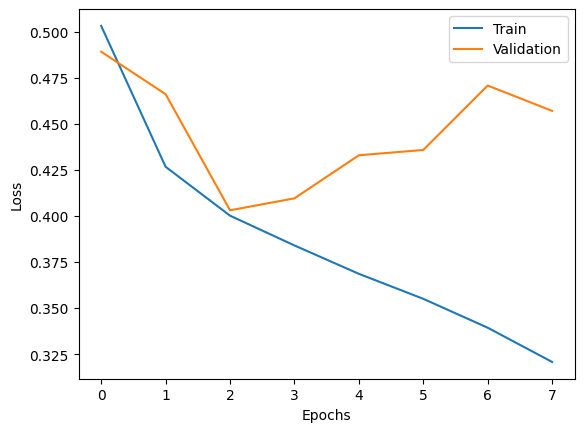

In [149]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [150]:
from sklearn.metrics import f1_score
y_pred = MLP.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
MLP.evaluate(X_test, y_test, verbose=1)
print("F1 ->", f1_score(y_test, y_pred))


20/20 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.7923 - mse: 0.3852
F1 -> 0.5112781954887218


In [151]:
counter = 0
for i in range(len(y_pred)):
    if(y_pred[i] != y_test[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

130

In [152]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [153]:
tn, fp, fn, tp

(428, 103, 27, 68)